# Tutorial 3: Introducción a clasificación usando Python

**Fecha:** Abril 2024

**Objetivo:** El objetivo de este tutorial es relacionarse con las bibliotecas necesarias para entrenar clasificadores usando Python.


# Herramientas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # Naive bayes
from sklearn.neighbors import KNeighborsClassifier


# Clasificación usando Python

## Scikit-learn

Hay muchas bibliotecas para hacer análisis de datos. Para este tutorial vamos a usar **scikit-learn** (http://scikit-learn.org) que contiene muchos modelos de machine learning ya instalados.

**OJO**: Si ya instalaste *Anaconda*, no necesitas instalar nada dado que viene en el pack.

## Ejemplo: Iris Dataset

Vamos a ocupar el dataset **iris** disponible en sklearn, que contiene 150 **instancias** (filas) de 3 **clases** diferentes de flores. El método **load_iris** permite cargar el dataset.

In [2]:
#Para cargar las bibliotecas, haz click en el siguiente bloque de código, y ejecútalo presionando `Shift+Enter`:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

X = iris.data      ## datos, caracteristicas o features de cada flor.

y = iris.target    ## clase para cada instancia anterior.

print("X:\n", X[:10])   # muestra las primeras 10 filas que corresponden a las caracteristicas de 10 flores.
print("y:\n", y[:10])   # muestra las primeras 10 clases para cada una de las instancias de X

X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y:
 [0 0 0 0 0 0 0 0 0 0]


Para saber cuáles son las clases:

In [4]:
print(iris.target)  # mostramos todas las clases de X

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**0 Corresponde a setosa;
1 Corresponde a versicolor;
2 Corresponde a virginica**

In [5]:
iris_df = pd.DataFrame(dict(zip(iris.feature_names, iris.data.T)))
iris_df['target'] = [iris.target_names[t] for t in iris.target]

In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Hay 50 instancias de cada clase

In [7]:
iris_df.target.value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Lo que haremos a continuación será entrenar un clasificador y predecir con nuevos datos.

## Nuestro primer clasificador

Entrenaremos nuestro primer clasificador con *Iris dataset*.
Para esto, usaremos un árbol de decisión.

In [8]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

clf.fit(X, y)   ## Entrenar usando X (features), y (clase)

DecisionTreeClassifier(random_state=0)

Con el método **fit** entrenamos el clasificador con los datos de <b>X</b> y la clase asociada a cada uno, **y**. Para ver qué tan bien fue el entrenamiento, podemos evaluar el clasificador ejecutándolo sobre instancias y verificando que la clase sea la correcta.

Ya hemos entrenado nuestro clasificador empleando **fit**. Luego para predecir, usamos **predict**.

In [9]:
y_pred = clf.predict(X)   ## predecir 'y' usando la matriz 'X'
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Por ejemplo, si ejecutáramos ```clf.predict([[5.1, 3.5, 1.4, 0.2]])```, le estamos pasando al clasificador un dato con valores **[5.1, 3.5, 1.4, 0.2]**. Al ejecutar **predict**, éste nos retornará un arreglo con el valor <b>0</b>, indicando que esos datos fueron clasificados como la clase **0 (setosa)**.

En **scikit-learn** existe el método **accuracy_score** que computa el Accuracy de la clasificación:

In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


Como se puede apreciar, tuvimos un accuracy del 100% con el clasificador (1.0). Sin embargo, **hicimos algo incorrecto**: evaluamos el clasificador con los mismos datos con los cuales lo entrenamos!

Al hacer esto, lo que terminamos haciendo fue *aprender de los datos de entrada* y evaluamos (o testeamos) usando los mismos datos. Esto también se denomina **overfitting**.

También podríamos ver otras métricas como precision, recall y f-score.

In [11]:
from sklearn.metrics import precision_score

print("Precision Micro:", precision_score(y, y_pred, average='micro'))
print("Precision Macro:", precision_score(y, y_pred, average='macro'))

Precision Micro: 1.0
Precision Macro: 1.0


In [12]:
from sklearn.metrics import recall_score

print("Recall Micro:", recall_score(y, y_pred, average='micro'))
print("Recall Macro:", recall_score(y, y_pred, average='macro'))

Recall Micro: 1.0
Recall Macro: 1.0


In [13]:
from sklearn.metrics import f1_score

print("f1 Micro:", f1_score(y, y_pred, average='micro'))
print("f1 Macro:", f1_score(y, y_pred, average='macro'))

f1 Micro: 1.0
f1 Macro: 1.0


Sklearn incluye la función `classificatio_report`, que calcula todas las métricas anteriores.

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



Desde luego, la clasificación es "perfecta". Para tener un resultado más realista de la clasificación vamos a dividir el dataset en dos: **training set** y **test set**.

El **training_set** nos permite aprender de ejemplos y ajustar el clasificador de acuerdo a éstos.
El **test_set** nos permitirá comprender qué tan bien **generalizamos** con nuevos datos.

 En **scikit-learn** existe un método llamado **train_test_split**, que nos permite hacer esta separación de manera aleatoria y estratificada (es decir, manteniendo la proporción de clases entre las instancias de cada set):

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=37, stratify=y)

El método retorna cuatro listas, los correspondientes a train y a test. Es decir, para el entrenamiento se usará **X_train** que tiene los features de entrenamiento e **y_train** que son sus respectivas clases. Así mismo, para probar con nuevos datos (testing), usaremos **X_test** como los features de entrada e **y_test** como las clases respectivas.

* El parámetro **test_size** nos permite regular la fracción de los datos que irán a test; en este caso 33% del dataset completo.

* El parámetro **random_state** nos permite fijar la semilla para tener resultados consistentes (genera la misma partición de datos). Si ejecutamos el método varias veces con la misma semilla, nos mostrará los mismos resultados siempre.

* El parámetro **stratify** recibe un arreglo con la distribución de clases, y el método intenta mantener esa misma distribución en las listas resultantes. Si no hicieramos esto, podríamos, por ejemplo, tener muchos datos de una clase en el set de entrenamiento.

Ahora, al fin, podemos probar nuestro clasificador:

In [16]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0)
clf.fit(X_train, y_train)    ## Entrenamos con features X_train y clases y_train

y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)

print(classification_report(y_test, y_pred))   ## Evaluamos la predicción comparando y_test con y_pred

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Matriz de confusión

La matriz de confusión muestra cuantos elementos de cada clase son asignados a cada una de las posibles opciones por el clasificador. Con este método se puede visualizar de manera sencilla qué errores de clasificación está cometiendo el modelo.

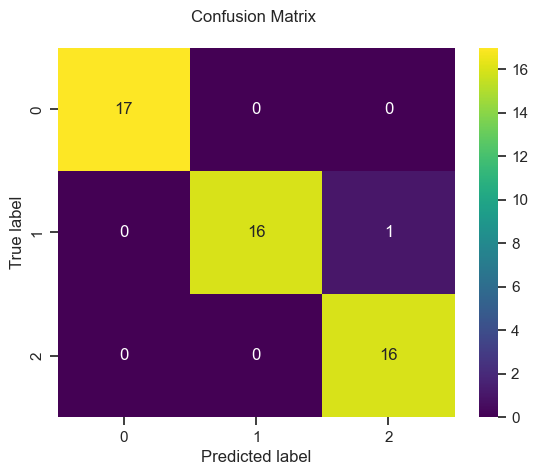

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) # calcula valores de la matriz de confusión

fig, ax = plt.subplots()

ax = sns.heatmap(cm, annot=True, cmap="viridis") # transforma la matriz en un heatmap para su visualización

ax.set_title('Confusion Matrix \n')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.show()

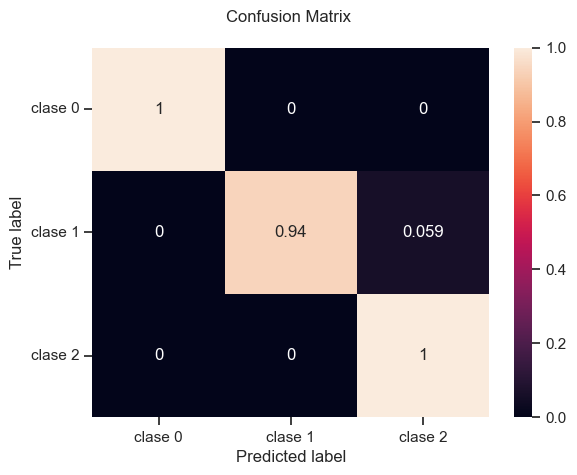

In [18]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

fig, ax = plt.subplots()

ax = sns.heatmap(cm, annot=True, vmin=0, vmax=1)

ax.set_title('Confusion Matrix \n')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

class_labels = ['clase 0', 'clase 1', 'clase 2']
ax.set_yticklabels(class_labels, rotation=0)
ax.set_xticklabels(class_labels)

plt.show()

## Cross Validation

Para realizar una evaluación más robusta del desempeño del modelo, una opción es aplicar validación cruzada. Esto es posible en sklearn mediante la función `cross_validate`:

In [19]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)#, return_train_score=True)

`cross_validate` resive los siguientes parámetros:

- Un clasificador
- Los datos (X)
- Las clases de cada instancia de los datos (y)
- cv: número de particiones en que se divide el dataset
- scoring: métricas a evaluar
- return_train_score: si es `True` calcula las métricas también para el entrenamiento
- return_estimator: si es `True` retorna los clasificadores entrenados en cada iteración

La función entrega un diccionario con los resultados obtenidos para cada métrica, además del tiempo que demora el entrenamiento y la evaluación.

In [20]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro', 'test_accuracy', 'test_f1_macro'])

In [21]:
cv_results['test_accuracy']

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [22]:
print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:   ', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score: ', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary: ', np.mean(cv_results['test_accuracy']))

Promedio Precision: 0.9644444444444445
Promedio Recall:    0.96
Promedio F1-score:  0.9597306397306398
Promedio Accucary:  0.96


## Otros clasificadores

Sklearn incluye varios modelos de clasificación que pueden entrenar y evaluar de igual forma que el árbol de decisión

### Naive Bayes

In [23]:
nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

nb_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### K-Nearest Neighbors

In [24]:
kn_clf = KNeighborsClassifier(n_neighbors=5)

kn_clf.fit(X_train, y_train)

y_pred = kn_clf.predict(X_test)

kn_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Support Vector Machine

In [25]:
sv_clf = SVC(C=1.0, kernel='rbf')

sv_clf.fit(X_train, y_train)

y_pred = sv_clf.predict(X_test)

sv_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = SVC(C=1.0, kernel='rbf')

rd_clf.fit(X_train, y_train)

y_pred = rd_clf.predict(X_test)

rd_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Dummy

Sklearn también incluye la clase `DummyClassifier`, esta corresponde a un clasificador que realiza una clsificación trivial y se puede usar como punto de comparación para el resto de clasificadores. Si un modelo obtiene valores similares al los de `DummyClassifier`, se podría decir no ha logrado aprender de los datos.

In [27]:
dm_clf = DummyClassifier(strategy='stratified')

dm_clf.fit(X_train, y_train)

y_pred = dm_clf.predict(X_test)

dm_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.53      0.46        17
           1       0.50      0.29      0.37        17
           2       0.44      0.50      0.47        16

    accuracy                           0.44        50
   macro avg       0.45      0.44      0.43        50
weighted avg       0.45      0.44      0.43        50



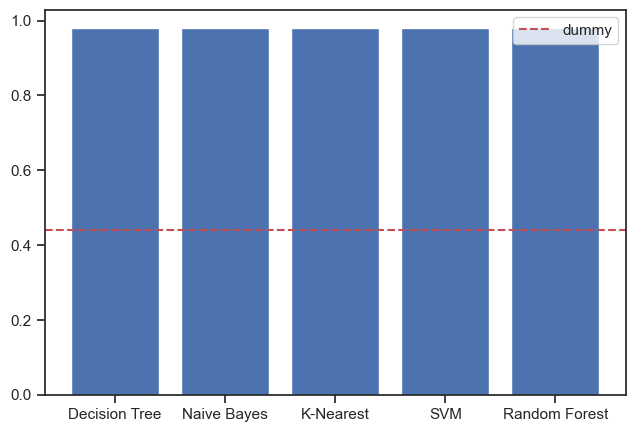

In [28]:
dt_acc = accuracy_score(y_test, clf.predict(X_test))

fig, ax = plt.subplots(figsize=(7.5, 5))

accuracies = [dt_acc, nb_acc, kn_acc, sv_acc, rd_acc]
classifires = ['Decision Tree', 'Naive Bayes', 'K-Nearest', 'SVM', 'Random Forest']

ax.bar(classifires, accuracies)
ax.axhline(dm_acc, color='r', linestyle='--', label='dummy')

ax.legend()

plt.show()